In [17]:
!pip install -U imbalanced-learn

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from google.colab import files

In [19]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df['date'] = pd.to_datetime(df['date'], format='%m%d%H%M', errors='coerce')

df['delayed'] = (df['delay'] > 15).astype(int)

top_airports = df['origin'].value_counts().nlargest(2).index.tolist()
print("Selected Airports:", top_airports)
df = df[df['origin'].isin(top_airports)]

df = pd.get_dummies(df, columns=['origin', 'destination'], drop_first=True)

X = df.drop(columns=['delay', 'date', 'delayed'])
y = df['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Saving departuredelays.csv to departuredelays (2).csv
Selected Airports: ['ATL', 'DFW']


Model Accuracy: 0.7833343751953491
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     25069
           1       0.36      0.00      0.00      6925

    accuracy                           0.78     31994
   macro avg       0.57      0.50      0.44     31994
weighted avg       0.69      0.78      0.69     31994



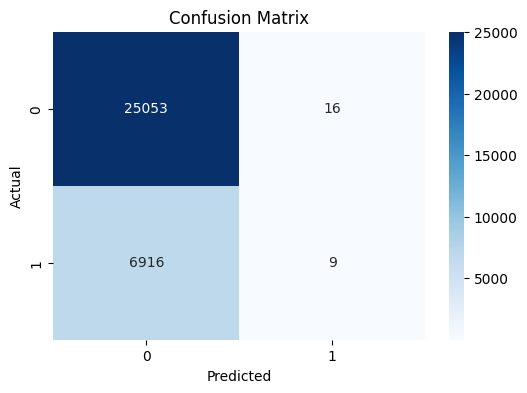

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_before_smote = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy_before_smote)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix_before_smote = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_before_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

Model Accuracy applying SMOTE: 0.5474151403388136
Classification Report applying SMOTE:
               precision    recall  f1-score   support

           0       0.80      0.56      0.66     25069
           1       0.24      0.51      0.33      6925

    accuracy                           0.55     31994
   macro avg       0.52      0.53      0.49     31994
weighted avg       0.68      0.55      0.59     31994



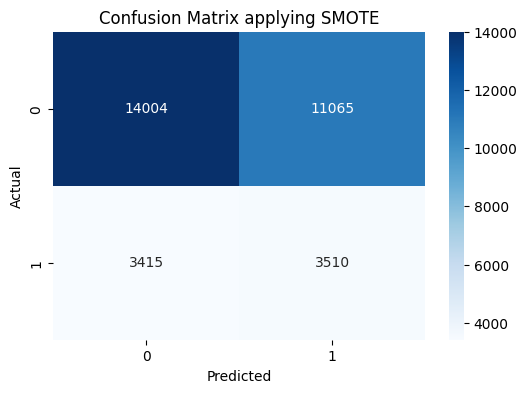

In [31]:
y_pred_resampled = model.predict(X_test)

accuracy_after_smote = accuracy_score(y_test, y_pred_resampled)
print("Model Accuracy applying SMOTE:", accuracy_after_smote)

print("Classification Report applying SMOTE:\n", classification_report(y_test, y_pred_resampled))

conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix applying SMOTE")
plt.show()

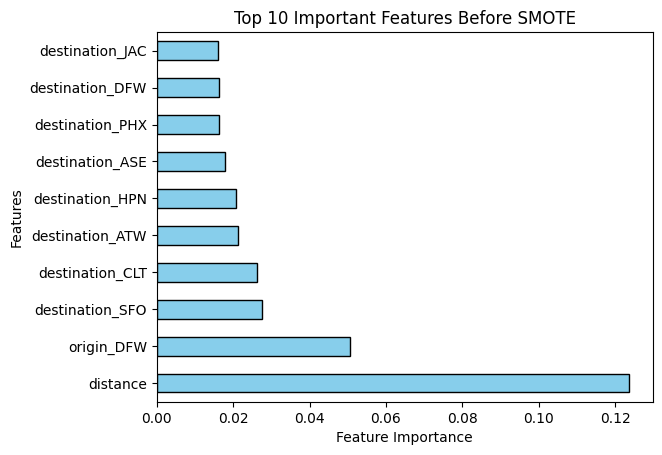

In [24]:
feature_importance_before = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance_before.nlargest(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features Before SMOTE")
plt.show()

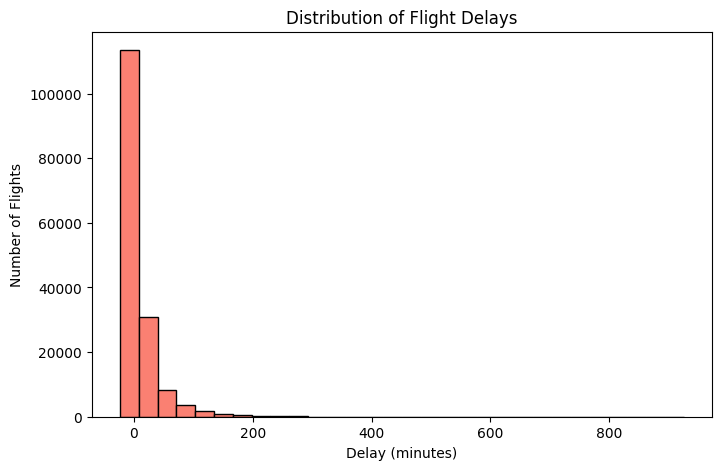

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(df['delay'], bins=30, color='salmon', edgecolor='black')
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.title("Distribution of Flight Delays")
plt.show()